**Breast Cancer Detection
Team CAVA:
Chintan Chandrashekhar Bhargave,
Amulya Rao Ravindra,
Vaishnvai Sanjay Gadve,
Abdulla Killedar** 

**Background and Motivation**

Breast cancer originates in the breast tissue. It occurs when breast cells mutate (change) and grow out of control, creating a mass of tissue (tumor).
The most commom type of breast cancer is Invasive Ductal Carcinoma(IDC).About 8 in 10 breast cancers are IDCs.There are various  steps carried out to determine to diagonose breast cancer: Breast Ultrasound, Mammogram,Breast Mangnetic Resonance Imaging and Biopsy. The last technique that is biopsy is quiet a painful procedure. This is a test that removes tissue or fluid from the breast to be looked at under a microscope and do more testing. There are different kinds of biopsies (for example, fine-needle aspiration, core biopsy, or open biopsy).
This has to be done manually and is a time consuming process. Furthermore the decision depends on the expertise of the pathologist and his or her equipment.

Therefore, deep learning plays a vital role in automatically detecting and locating tumor tissue cells and to speed up the process of cancer detection. In order to exploit the full potential we could build a pipeline using massive amounts of tissue image data of various hospitals that were evaluated by different experts. This way dependence on the pathologist is greatly reduced and is   especially useful in regions where no experts are available.


**Goal of the Project**

The goal of this project is to come up with a deep learning model by appling Convolutional Neural Network, Reccuring Neural Network and Artificial Neural Network algorithms that can identify cancerous cells from non-cancerous cells without the patients having to go through biopsy.

**Importing the libraries and reading the data from kaggle**

In [1]:
# Importing all required Library

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from PIL import Image


from sklearn.model_selection import train_test_split

from glob import glob
from skimage.io import imread
from os import listdir

from tqdm import tqdm_notebook as tqdm

import os

import matplotlib.pylab as plt

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import files

import keras_preprocessing.image as im

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler


import random

In [8]:
# Upload the kaggle json file to fetch the dataset from
upload = files.upload()

Saving kaggle.json to kaggle (2).json


In [9]:
#Config path for Kaggle json
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [10]:
#Zipped files from Kaggle
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

breast-histopathology-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
# This is done to unzip the kaggle files
!unzip -o breast-histopathology-images.zip "IDC_regular_ps50_idx5/*/*.*" -d /content/breast-histopathology-images

Streaming output truncated to the last 5000 lines.
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: /content/breast-

In [12]:
#To get the files recurssively
DATA_PATH = "/content/breast-histopathology-images/IDC_regular_ps50_idx5"
files = listdir(DATA_PATH)

images = glob('/content/breast-histopathology-images/IDC_regular_ps50_idx5/**/*/*.png', recursive = True)

**Primary analysis of the Data**

In [13]:
folders = glob('/content/breast-histopathology-images/IDC_regular_ps50_idx5/*', recursive = True)
p_id = []
for i in tqdm(folders):
  if(i[-5] == '/'):
    p = int(i[-4:])
    p_id.append(p)
  else:
    p = int(i[-5:])
    p_id.append(p)

print('Number of Patients: ',len(p_id))

  0%|          | 0/279 [00:00<?, ?it/s]

Number of Patients:  279


From the abpove function the results show that there are in total 279 patients and each has two patches for cancerous and noncancerous cells depicted as 1 & 0 respectively. Each is a histopathology image of a single patch

**To get the total number of patches for all the patients**

In [14]:
len(images)

277524

In [15]:
image_count = []
for i in p_id:
  dir = glob('/content/breast-histopathology-images/IDC_regular_ps50_idx5/'+ str(i) +'/*/*', recursive = True)
  image_count.append(len(dir))

In [16]:
image_count

[2111,
 182,
 2216,
 2009,
 1462,
 236,
 1128,
 1652,
 1154,
 769,
 2278,
 1226,
 1505,
 2031,
 890,
 1385,
 1002,
 1197,
 1185,
 1076,
 249,
 1825,
 1821,
 949,
 680,
 842,
 517,
 1438,
 1434,
 607,
 342,
 158,
 326,
 1171,
 2004,
 1230,
 1118,
 2096,
 478,
 239,
 1062,
 1493,
 613,
 273,
 1024,
 809,
 1520,
 416,
 1363,
 454,
 1457,
 1127,
 620,
 1703,
 586,
 614,
 483,
 1099,
 810,
 658,
 1290,
 410,
 2033,
 780,
 468,
 848,
 192,
 1040,
 1642,
 1053,
 1042,
 1904,
 155,
 211,
 1485,
 1000,
 443,
 1289,
 303,
 367,
 1166,
 870,
 646,
 571,
 94,
 219,
 861,
 712,
 564,
 2109,
 1191,
 1465,
 171,
 557,
 931,
 534,
 1426,
 465,
 507,
 422,
 227,
 1159,
 761,
 814,
 939,
 226,
 1781,
 598,
 830,
 530,
 2302,
 407,
 342,
 955,
 1716,
 1399,
 1361,
 1035,
 2212,
 1474,
 1172,
 2395,
 1634,
 789,
 155,
 1352,
 707,
 1542,
 986,
 1045,
 1122,
 717,
 386,
 979,
 355,
 1233,
 1807,
 431,
 1214,
 796,
 1398,
 1877,
 1103,
 869,
 715,
 975,
 1050,
 535,
 63,
 111,
 167,
 1627,
 2175,
 761,
 109

**Visualising the number of Patches per Patient**

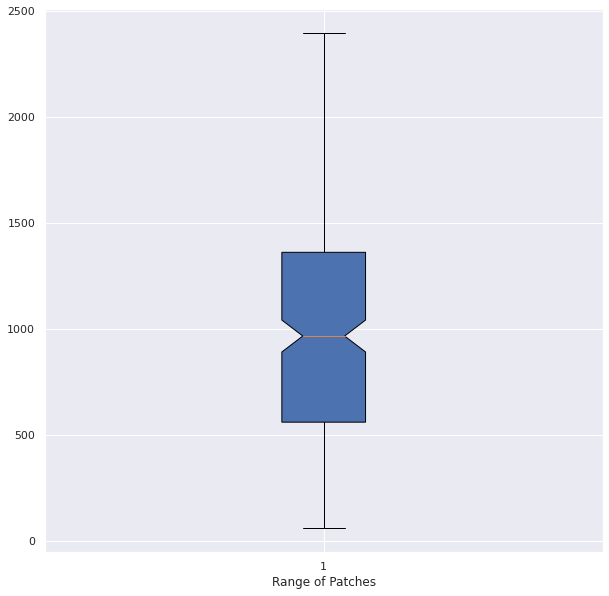

In [17]:
plt.figure(figsize=(10,10))
plt.boxplot(image_count, notch = True, patch_artist = True)
plt.xlabel('Range of Patches')
plt.show()

(0.0, 2500.0)

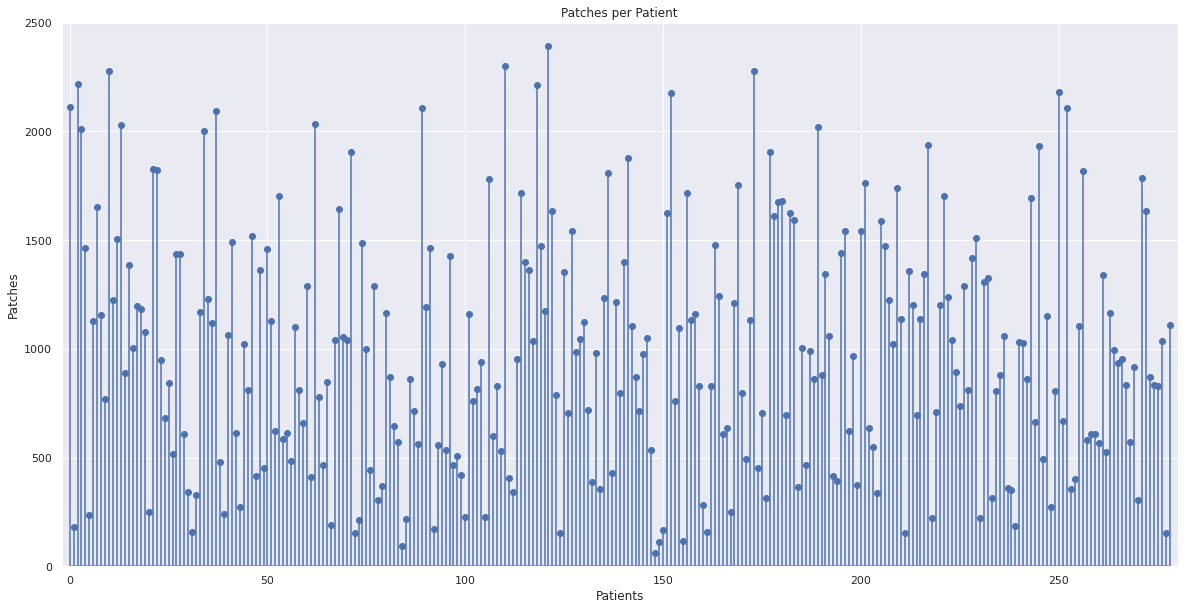

In [18]:
plt.figure(figsize=(20,10))
plt.stem(image_count)
plt.xlabel('Patients')
plt.ylabel('Patches')
plt.title('Patches per Patient')
plt.xlim(-2,280)
plt.ylim(0,2500)


**Separating out the Non-Cancerous and Cancerous Patches**

patches without cancer:  198738
patches with cancer:  78786


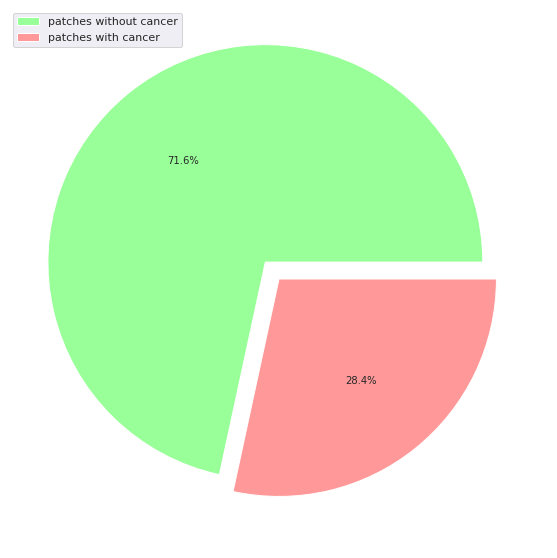

In [19]:
wo_cancer = [] #without cancer
w_cancer = [] # with cancer

for file in images: 
    if file.endswith('class0.png'): wo_cancer.append(file)
    else: w_cancer.append(file)

print("patches without cancer: ", len(wo_cancer))
print("patches with cancer: ", len(w_cancer))

labels = ('patches without cancer', 'patches with cancer')
plt.figure(figsize = (10, 10))
c = ['#99ff99','#ff9999']
plt.pie((len(wo_cancer), len(w_cancer)), explode = (0.1, 0), autopct='%1.1f%%', colors = c )
plt.legend(labels, loc = 'upper left')
plt.show()

We infer the following from the pie chart above:


*   There appears to be a bias between non-cancerous and cancerous cells
*   The data set is dominated by non-cancerous cells
*   We try to rnadomly select the non-cancerous patches that are of the same    number as cancerous patches
*   We feed these as inputs in modelling so the model gives a fair result





In [20]:
random.seed(10)
wo_cancer_sample = random.sample(wo_cancer, len(w_cancer))
print("Sample size of patches without cancer: ", len(wo_cancer_sample))
cancer_sample = random.sample(w_cancer, len(w_cancer))
print("Sample size of patches with cancer: ", len(cancer_sample))

Sample size of patches without cancer:  78786
Sample size of patches with cancer:  78786


**Plotting the Cancerous and Non-Cancerous Patches**

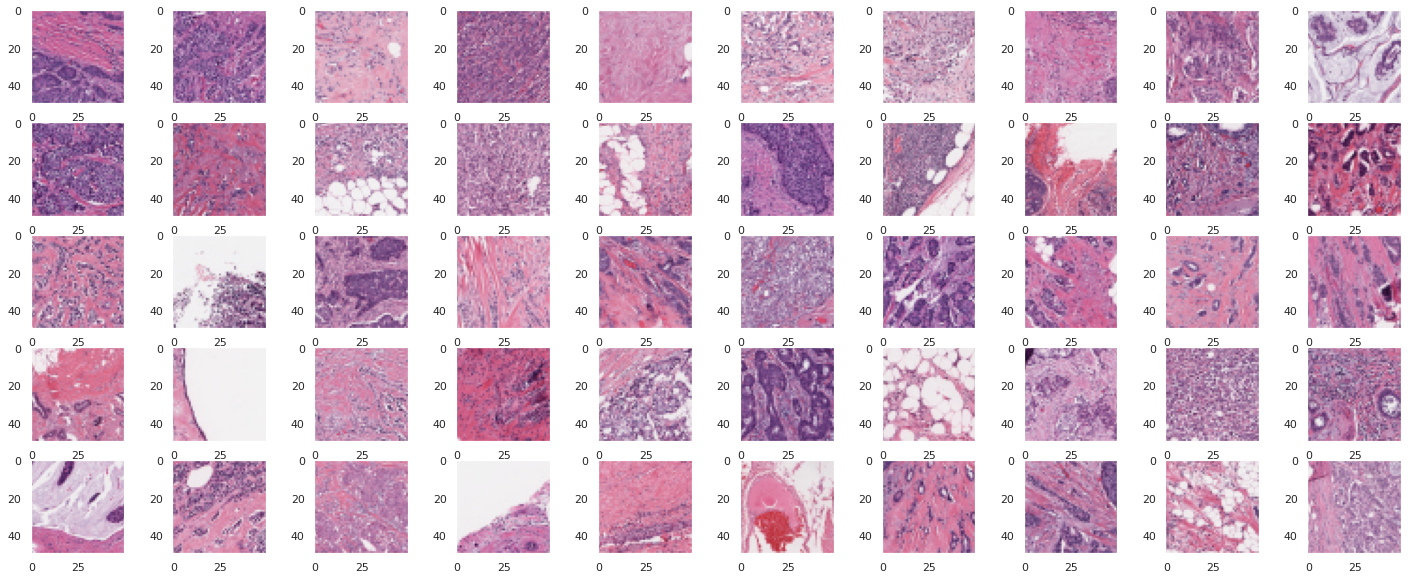

In [21]:
# Cancer
s = 0
fig, ax = plt.subplots(5,10,figsize=(25,10))

for n in range(5):
    for m in range(10):
        random.seed(s)
        s += 1
        image = imread(cancer_sample[random.randint(0, len(cancer_sample))])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

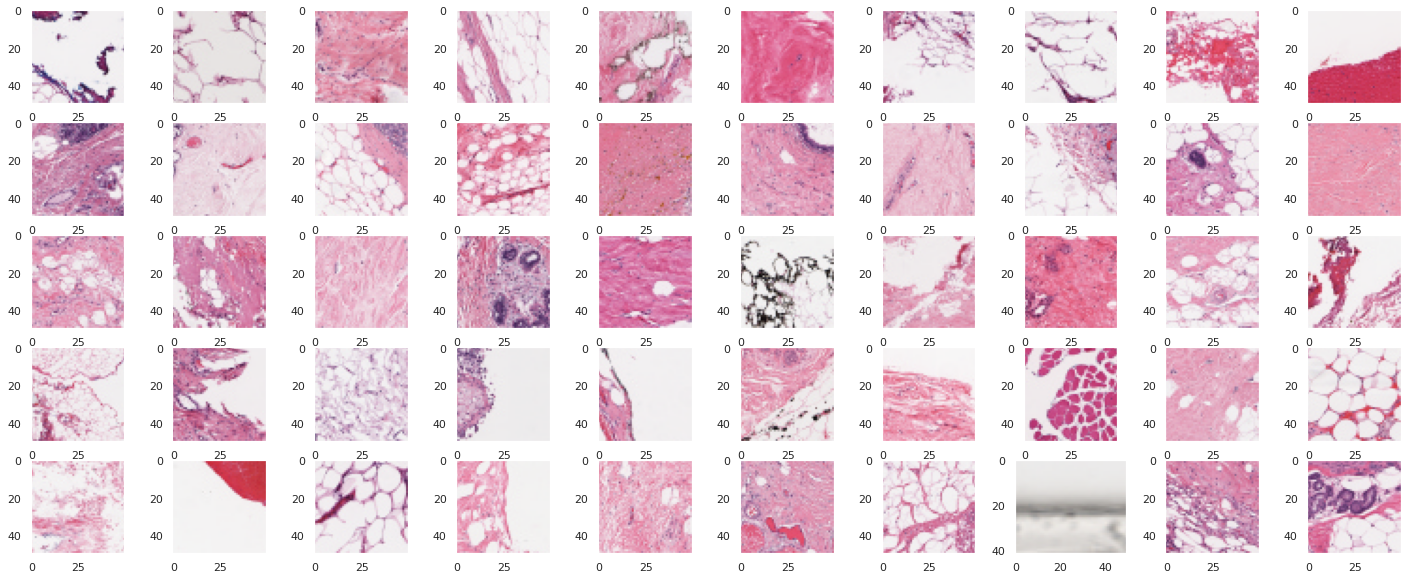

In [22]:
# Healthy
s = 55
fig, ax = plt.subplots(5,10,figsize=(25,10))

for n in range(5):
    for m in range(10):
        random.seed(s)
        s += 2
        image = imread(wo_cancer_sample[random.randint(0, len(wo_cancer_sample))])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

Inference:


*   Cancerous patches are darker in color than non-cancerous cells
*   But there are some non-cancerous patches that appear darker 



**Pre-Processing**

In [23]:
# Mix and Shuffle Dataset
# Divide by 50 due to system limitations 

random.seed(10)
data_mixed = random.sample(wo_cancer_sample, int(len(wo_cancer_sample) / 50)) + random.sample(cancer_sample, int(len(cancer_sample) / 50))
print('Total size of dataset: ',len(data_mixed))
random.shuffle(data_mixed)

Total size of dataset:  3150


In [24]:
data = []
labels = []

for i in tqdm(data_mixed):
    l = int(i[-5])
    img = im.img_to_array(im.load_img(i, target_size = (50,50)))
    data.append(img)
    labels.append(l)

  0%|          | 0/3150 [00:00<?, ?it/s]

**Train-Test Split**

In [25]:
# Setting  x and y values
# Train test split of data for modelling
# Standardizing the data

y = np.array(labels)
x = np.array(data)/255  #This is done to Normalize the data or to scale the image

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 19, test_size = 0.3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(2205, 50, 50, 3) (945, 50, 50, 3) (2205,) (945,)


**Fucntion for Recurssive Operations Charecteristics(ROC)**

In [26]:
#defining a function for roc_curve
def roc_curve_plot(roc_auc_train, roc_auc_test, fpr_ts_f, tpr_ts_f):
    plt.title('Receiver Operation characteristics')
    plt.plot(fpr_tr, tpr_tr, 'g', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_ts_f, tpr_ts_f, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Rate of True Positive')
    plt.xlabel('Rate of False Positive')
    plt.show()

**Function for Confusion Matrix** 

In [27]:
# plotting confusion matrix
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

**Convolutional Neural Network**

In [28]:
# CNN Model
def cnn_model():
	model = Sequential()
	model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (50,50,3), activation = 'relu'))
	model.add(MaxPool2D(pool_size = (2,2)))
	model.add(MaxPool2D(pool_size = (2,2)))
	model.add(Dropout(0.25))
	model.add(Conv2D(filters = 32, kernel_size = (4,4), activation = 'relu'))
	model.add(MaxPool2D(pool_size = (2,2)))
	model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
	model.add(Dropout(0.25))
	model.add(Flatten())
	model.add(Dense(64, activation = 'relu'))
	model.add(Dense(1, activation = 'sigmoid'))
	model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
	return model

**Hyperparameter Tunning of the CNN Model**

In [29]:
# Hyperparameter tunning of CNN model
cnn_model_hyperparam = KerasClassifier(build_fn=cnn_model, verbose = 0)
batch_size = [10, 50, 100]
epochs = [10, 20, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid_cnn = GridSearchCV(estimator=cnn_model_hyperparam, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc', cv = 3)
grid_result_cnn = grid_cnn.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result_cnn.best_score_, grid_result_cnn.best_params_))

Best: 0.854165 using {'batch_size': 50, 'epochs': 30}


**ROC Curve**

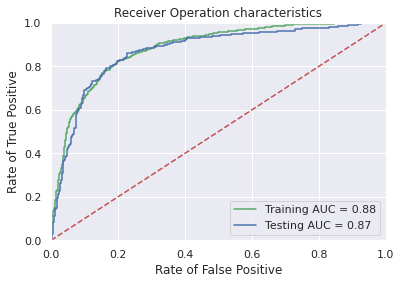

In [30]:
# CNN Predictions & ROC curve
y_pred_train_cnn = grid_cnn.predict_proba(x_train)[:,1]
y_pred_test_cnn = grid_cnn.predict_proba(x_test)[:,1]

fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train_cnn)
roc_auc_train_cnn = auc(fpr_tr, tpr_tr)

fpr_ts_cnn, tpr_ts_cnn, threshold = roc_curve(y_test, y_pred_test_cnn)
roc_auc_test_cnn = auc(fpr_ts_cnn, tpr_ts_cnn)

roc_curve_plot(roc_auc_train_cnn, roc_auc_test_cnn, fpr_ts_cnn, tpr_ts_cnn)

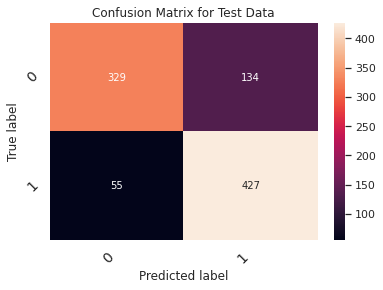

In [31]:
plot_conf_matrix(confusion_matrix(y_test, grid_result_cnn.predict(x_test)), "Test Data")

In [32]:
batch_size = 64
# Each image batch is a tensor of shape (batch_size, 50, 50).
# Each input sequence will be of size (50, 50) (height is treated like time).
input_dim = 50

units = 64
output_size = 2  # labels are from 0 to 1

**Reccurent Neural Network**

In [33]:
#  RNN model
def rnn_model():
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    lstm_layer = keras.layers.RNN(keras.layers.LSTMCell(units), input_shape=(None, input_dim))
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam")
    return model

In [34]:
x_rnn = np.zeros((x.shape[0], x.shape[1], x.shape[2]))

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        for k in range(x.shape[2]):
            x_rnn[i, j, k] = 0.11 * x[i, j, k, 0] + 0.59 * x[i, j, k, 1] + 0.3 * x[i, j, k, 2]

x_rnn_train, x_rnn_test, y_rnn_train, y_rnn_test = train_test_split(x_rnn, y, random_state=19, test_size=0.3)

**Hyperparamter Tunning of RNN Model**

In [35]:
rnn_model_hyperparam = KerasClassifier(build_fn=rnn_model, verbose = 0)
batch_size = [10, 50, 100]
epochs = [10, 20, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid_rnn = GridSearchCV(estimator=rnn_model_hyperparam, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc', cv = 3)
grid_result_rnn = grid_rnn.fit(x_rnn_train, y_rnn_train)
print("Best: %f using %s" % (grid_result_rnn.best_score_, grid_result_rnn.best_params_))

Best: 0.714965 using {'batch_size': 50, 'epochs': 10}


**ROC Curve for RNN Model**

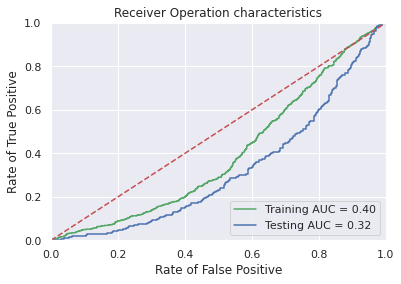

In [36]:
# RNN Predictions & ROC curve 
y_pred_train_rnn = grid_rnn.predict_proba(x_rnn_train)[:,1]
y_pred_test_rnn = grid_rnn.predict_proba(x_rnn_test)[:,1]

fpr_tr, tpr_tr, threshold = roc_curve(y_rnn_train, y_pred_train_rnn)
roc_auc_train_rnn = auc(fpr_tr, tpr_tr)

fpr_ts_rnn, tpr_ts_rnn, threshold = roc_curve(y_rnn_test, y_pred_test_rnn)
roc_auc_test_rnn = auc(fpr_ts_rnn, tpr_ts_rnn)

roc_curve_plot(roc_auc_train_rnn, roc_auc_test_rnn, fpr_ts_rnn, tpr_ts_rnn)

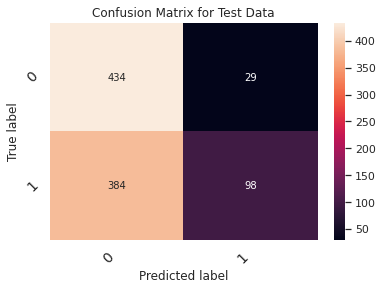

In [37]:
# RNN Confusion Matrix

plot_conf_matrix(confusion_matrix(y_rnn_test, grid_result_rnn.predict(x_rnn_test)), "Test Data")

In [38]:
x_train = x_train.reshape(-1, 7500)
x_test = x_test.reshape(-1, 7500)
print(x_train.shape, x_test.shape)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

(2205, 7500) (945, 7500)


**Artificial Neural Network**

In [39]:
def ann_model():
    model = Sequential()
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7500))
    model.add(Dropout(0.5))
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    return model

**Hyperparamter Tunning of ANN Model**

In [40]:
ann_model_hyperparam = KerasClassifier(build_fn = ann_model, verbose = 0)
batch_size = [10, 50, 100]
epochs = [10, 20, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid_ann = GridSearchCV(estimator=ann_model_hyperparam, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc', cv = 3)
grid_result_ann = grid_ann.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result_ann.best_score_, grid_result_ann.best_params_))

Best: 0.836393 using {'batch_size': 100, 'epochs': 10}


**ROC Curve of ANN Model**

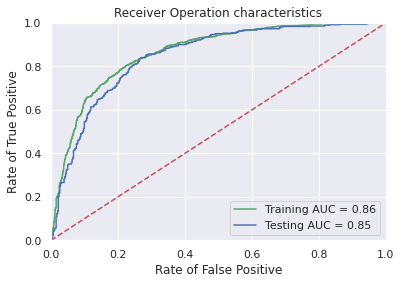

In [41]:
# ANN ROC Curve

y_pred_train_ann = grid_ann.predict_proba(x_train)[:,1]
y_pred_test_ann = grid_ann.predict_proba(x_test)[:,1]

fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train_ann)
roc_auc_train_ann = auc(fpr_tr, tpr_tr)

fpr_ts_ann, tpr_ts_ann, threshold = roc_curve(y_test, y_pred_test_ann)
roc_auc_test_ann = auc(fpr_ts_ann, tpr_ts_ann)

roc_curve_plot(roc_auc_train_ann, roc_auc_test_ann, fpr_ts_ann, tpr_ts_ann)

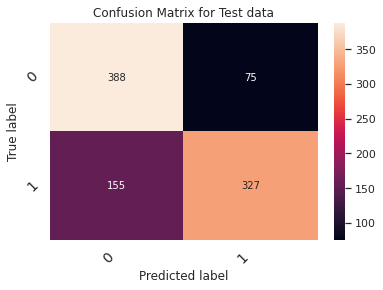

In [42]:
# ANN Confusion Matrix

plot_conf_matrix(confusion_matrix(y_test, grid_ann.predict(x_test)), "Test data")

[]

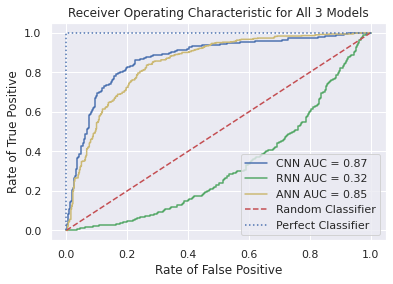

In [43]:
plt.plot(fpr_ts_cnn, tpr_ts_cnn, 'b', label = 'CNN AUC = %0.2f' % roc_auc_test_cnn)
plt.plot(fpr_ts_rnn, tpr_ts_rnn, 'g', label = 'RNN AUC = %0.2f' % roc_auc_test_rnn)
plt.plot(fpr_ts_ann, tpr_ts_ann, 'y', label = 'ANN AUC = %0.2f' % roc_auc_test_ann)
plt.plot([0, 1], [0, 1],'r--', label = 'Random Classifier')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label = 'Perfect Classifier')
plt.title('Receiver Operating Characteristic for All 3 Models')
plt.legend(loc = 'lower right')
plt.ylabel('Rate of True Positive')
plt.xlabel('Rate of False Positive')
plt.plot()